['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak', 'B_losses', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_GROUND_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_opp_KD', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_op

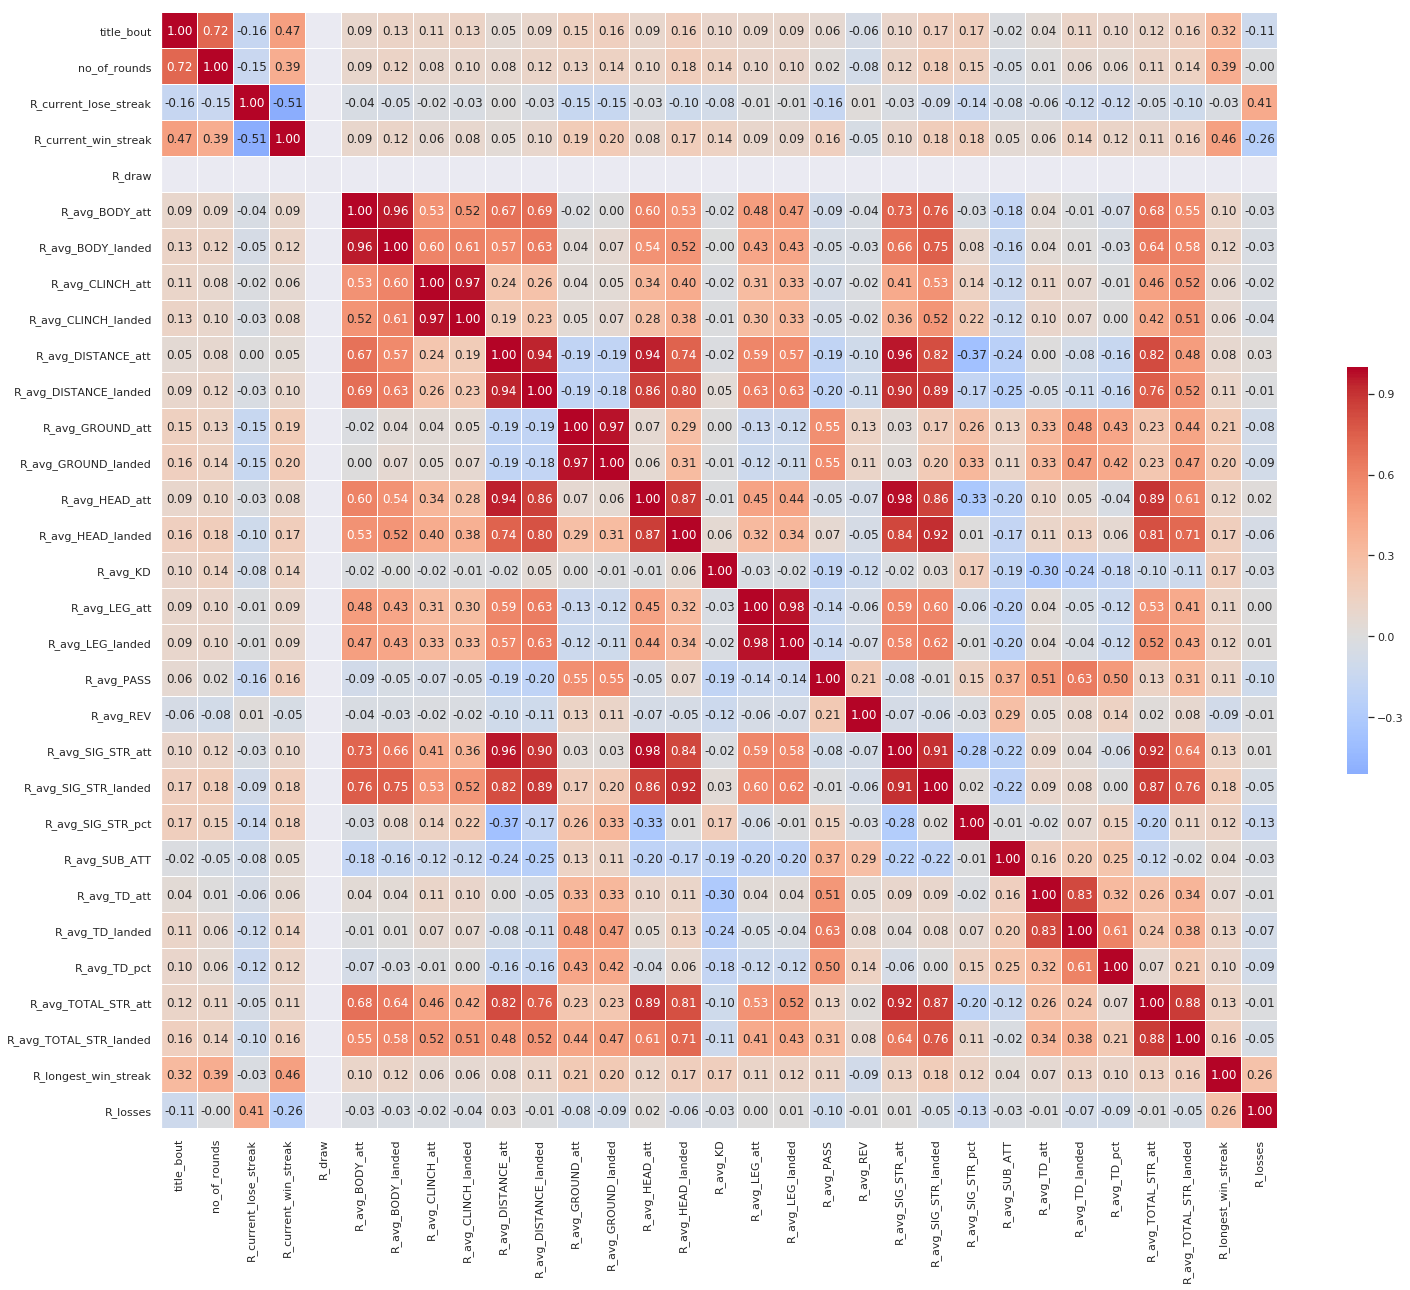

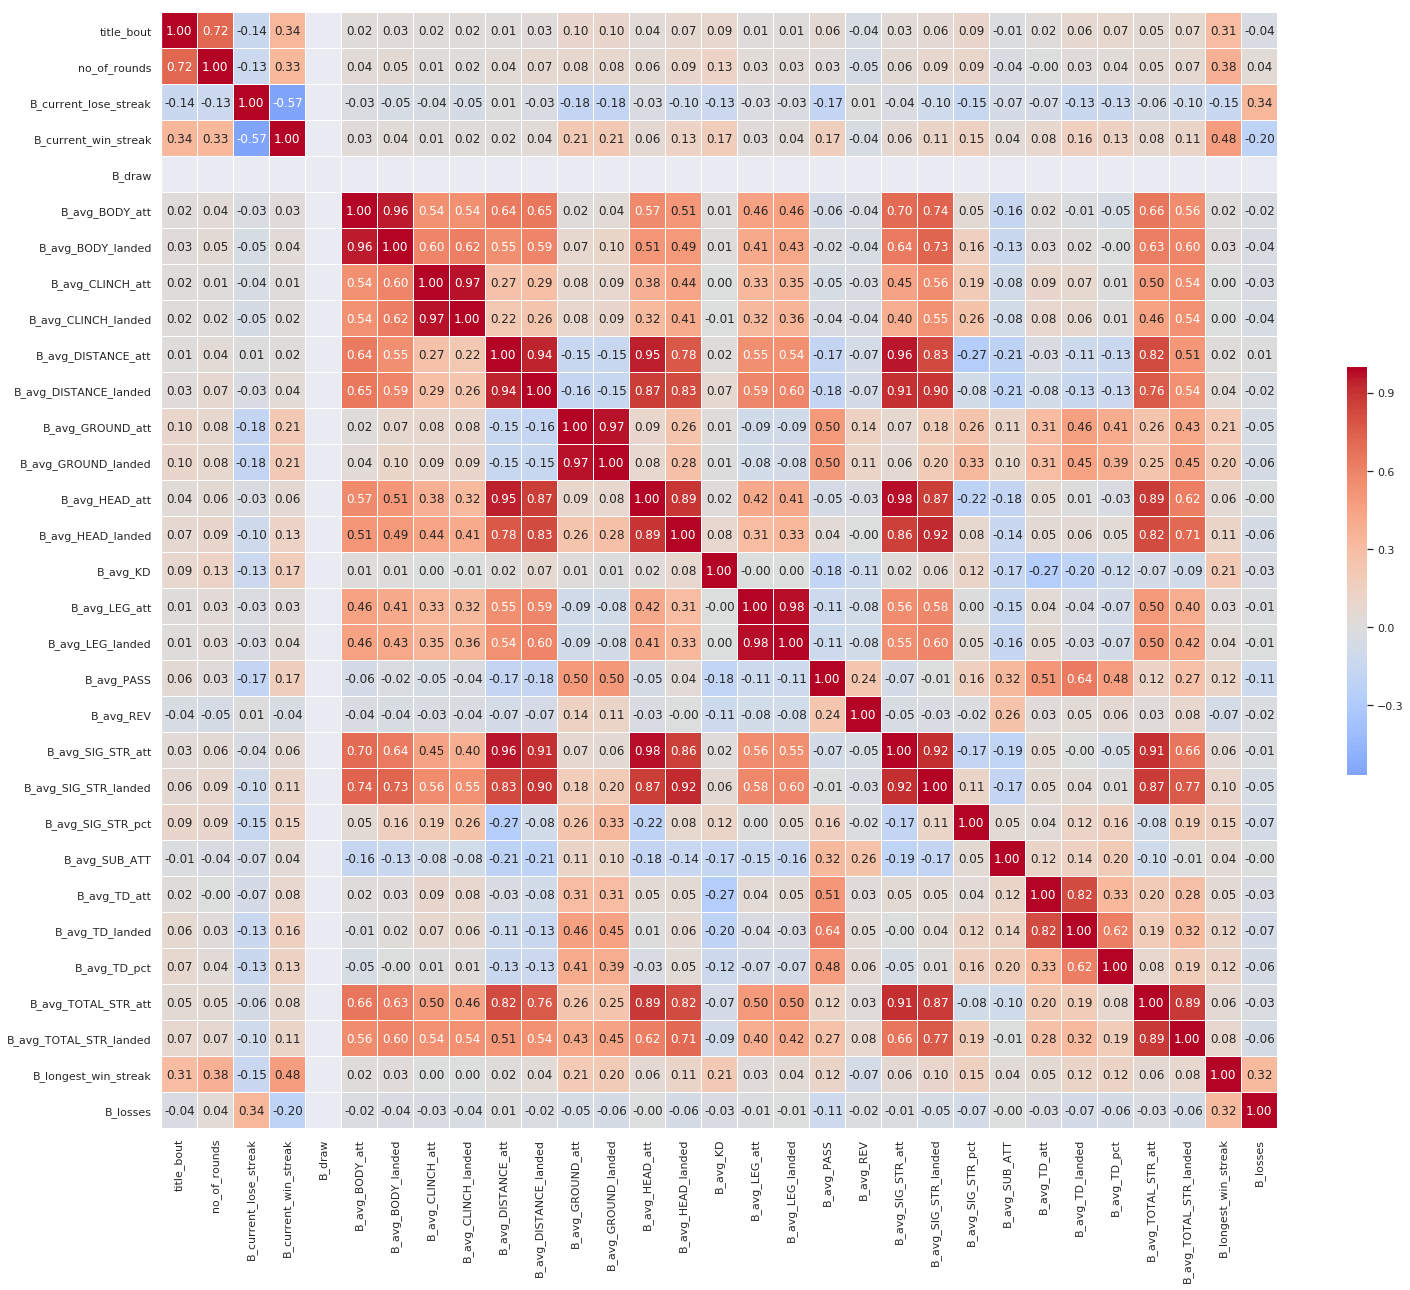

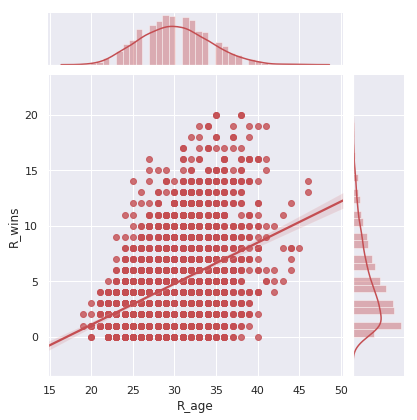

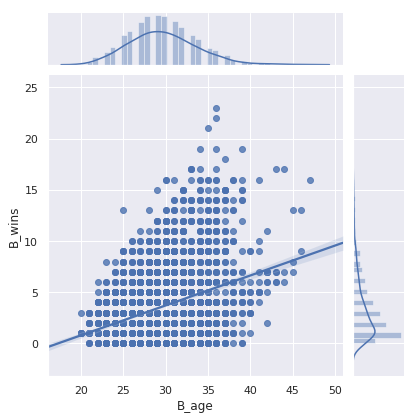

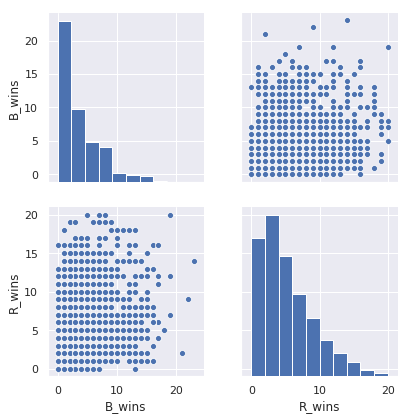

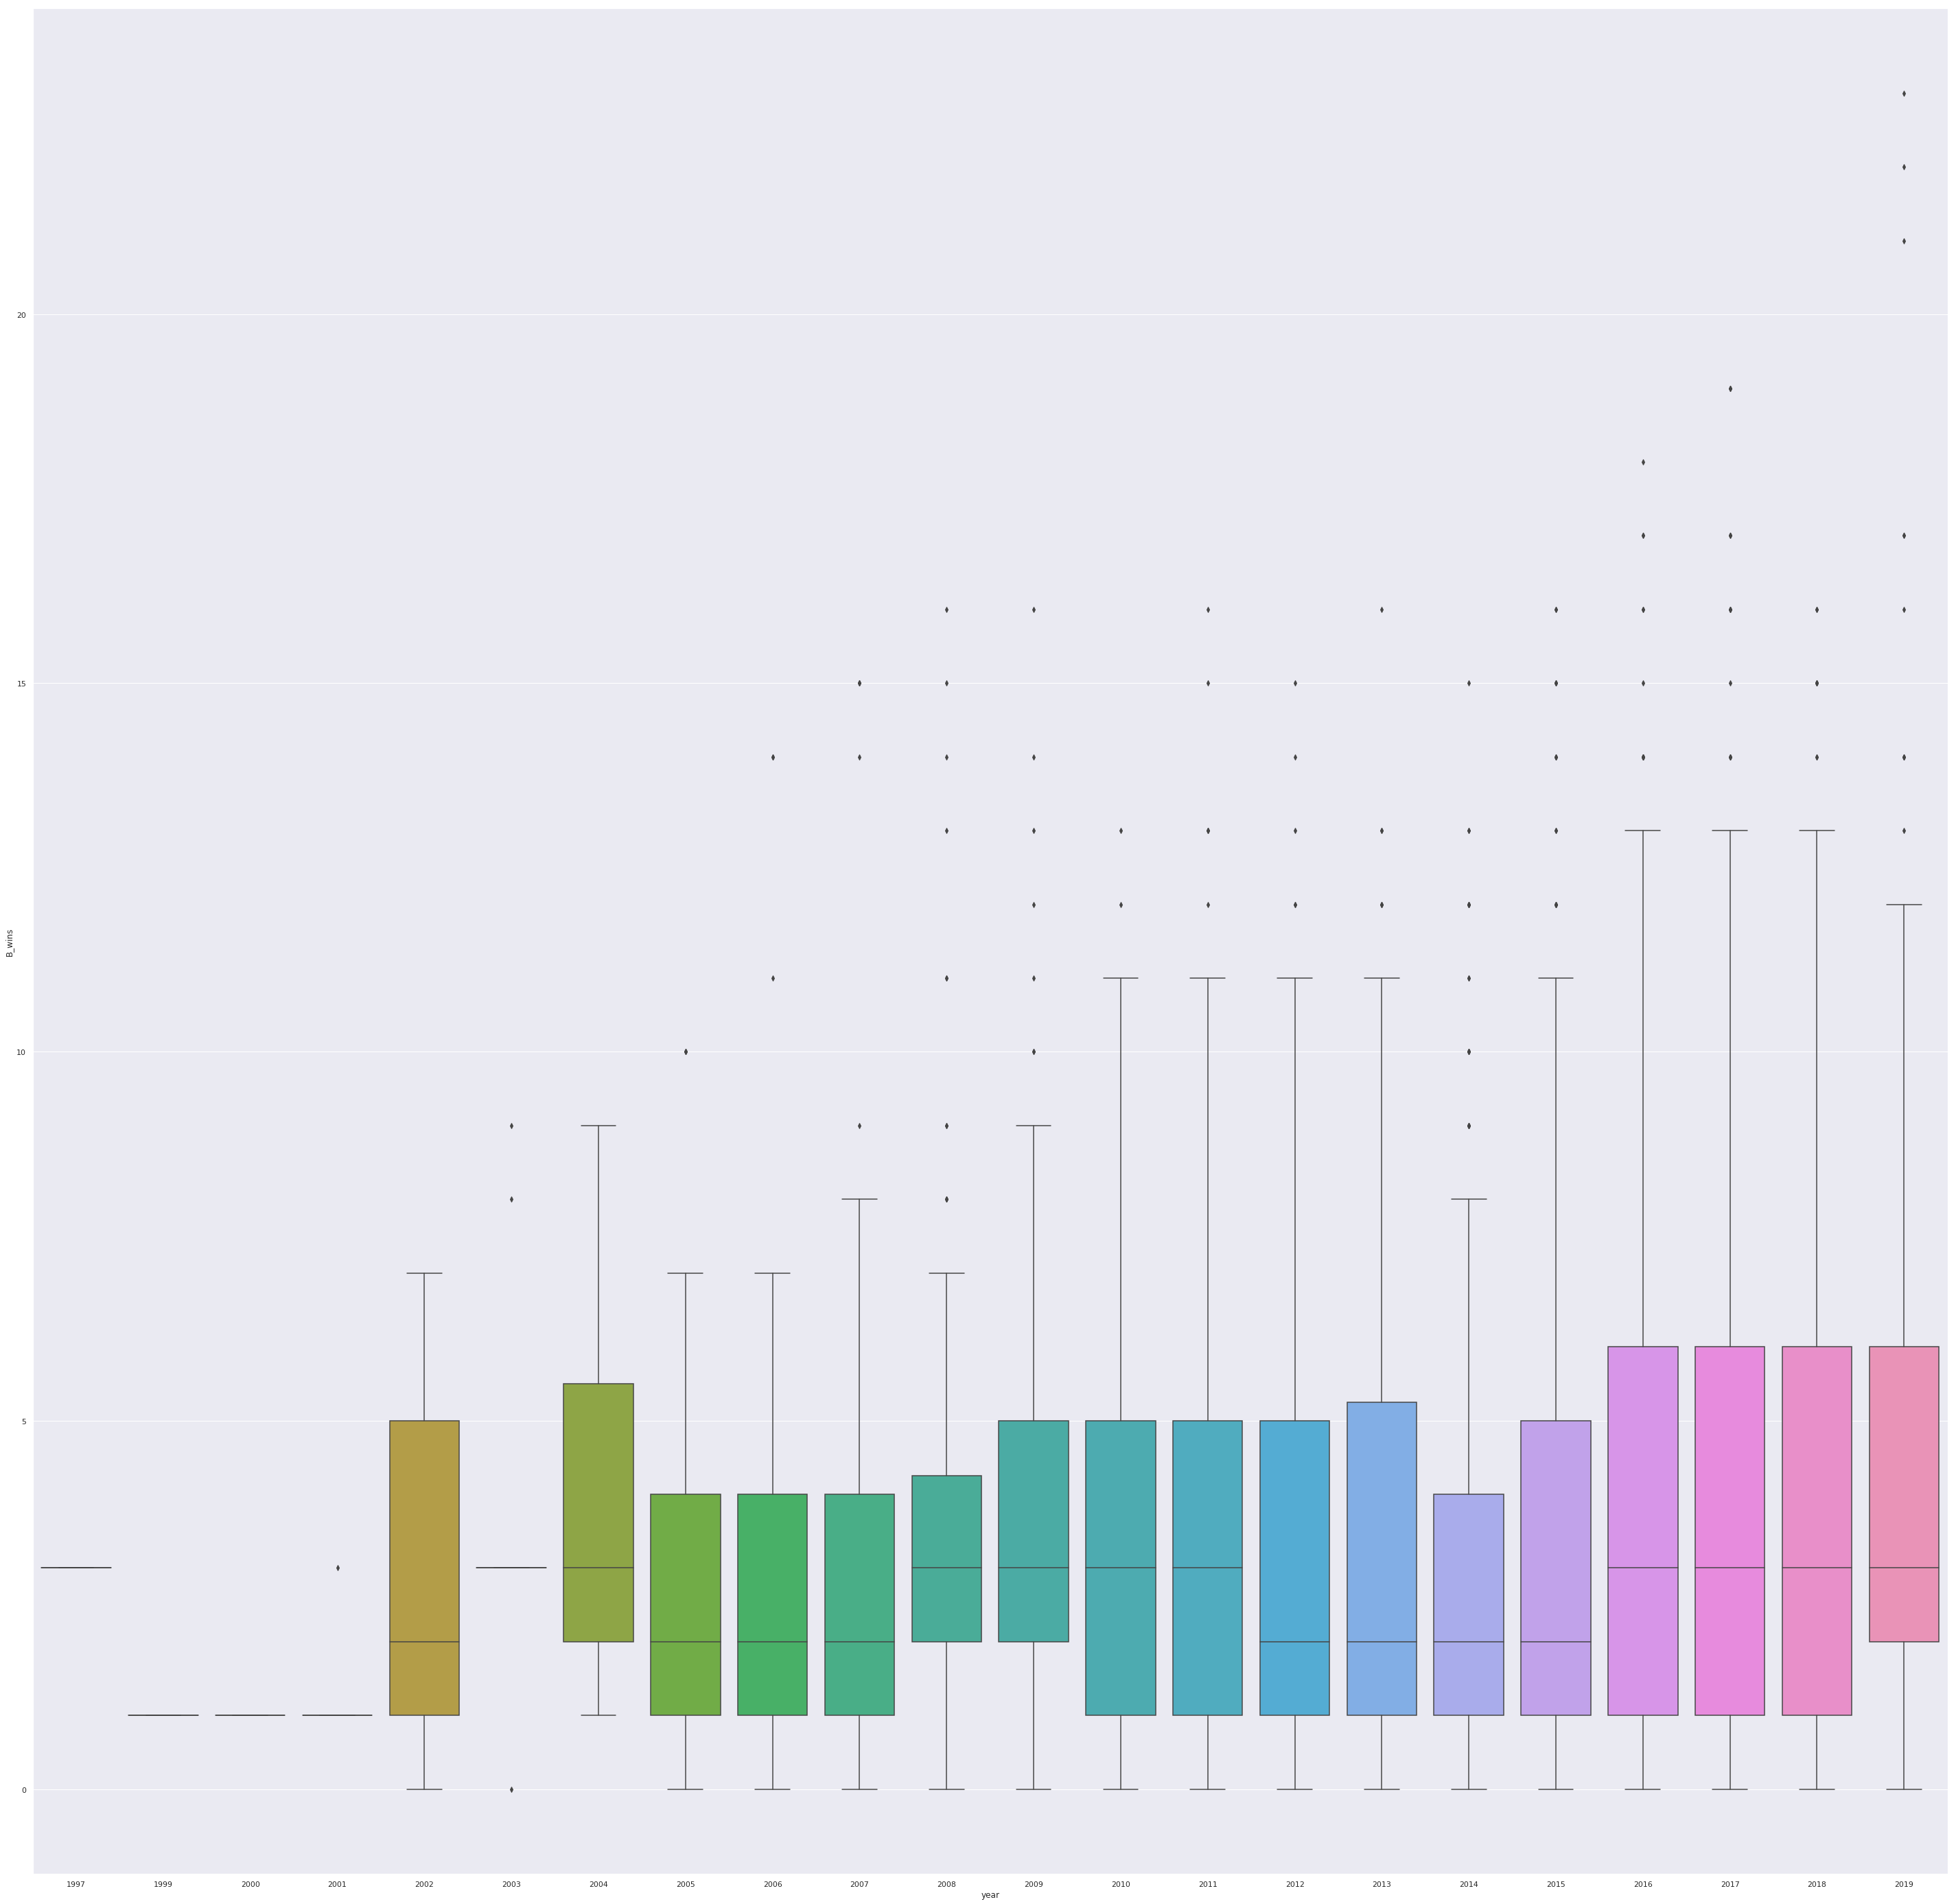

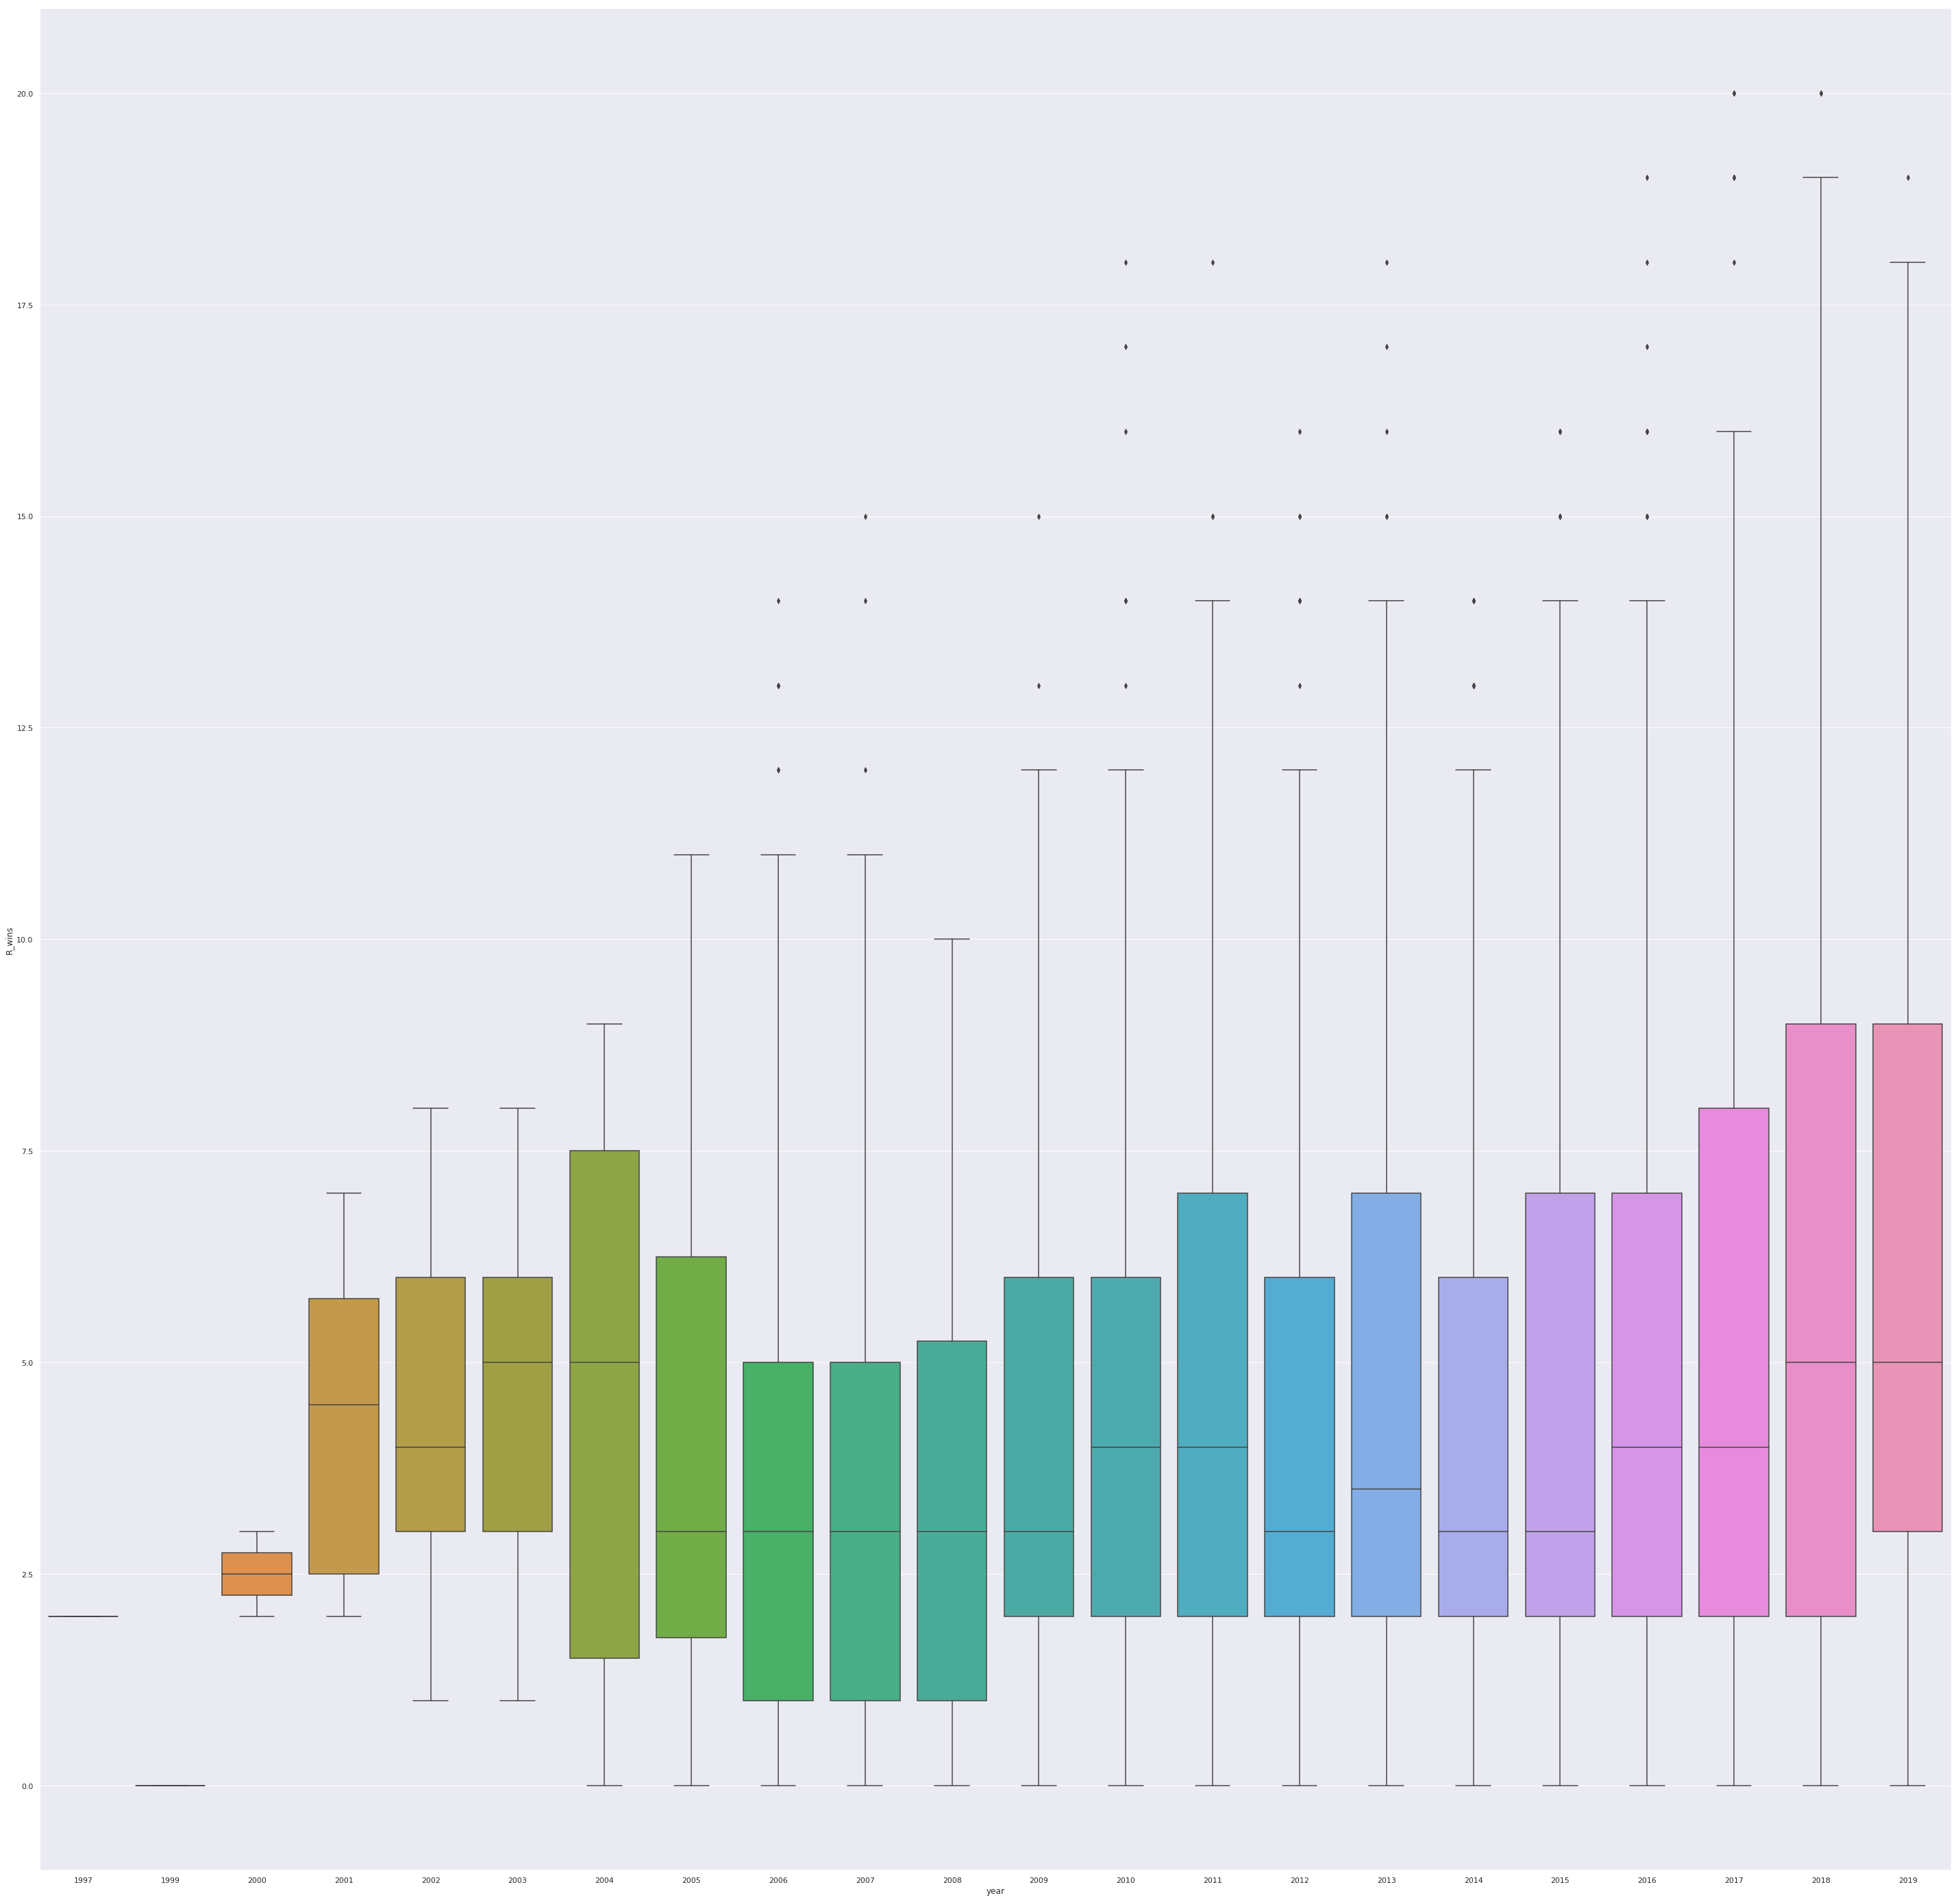

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objects as go
%matplotlib inline
# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(50,50)})
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("/kaggle/input/ufcdata/data.csv")

ls = list(df.columns.values)
print(ls)

df=df.dropna()

bcol = ['Winner', 'title_bout', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak', 'B_losses']
bdf = df[bcol]

rcol = ['Winner', 'title_bout', 'no_of_rounds', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_PASS', 'R_avg_REV', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak', 'R_losses']
rdf = df[rcol]

corr = rdf.corr()
g = sns.heatmap(corr,  vmax=1, center=0, square=True, fmt='.2f', cmap='coolwarm',annot=True, linewidths=.3, cbar_kws={"shrink": .3})

sns.despine()
g.figure.set_size_inches(25,25)

plt.show()

corr = bdf.corr()
g = sns.heatmap(corr,  vmax=1, center=0, square=True, fmt='.2f', cmap='coolwarm',annot=True, linewidths=.3, cbar_kws={"shrink": .3})

sns.despine()
g.figure.set_size_inches(25,25)


plt.show()


values = df.Winner.value_counts()
labels = df.Winner.unique()
colors = ['red', 'blue', 'green']
trace = go.Pie(labels=labels, 
               values=values,
                marker=dict(colors=colors) 
              )
layout = go.Layout(title='Winner Distribution by Corner Color')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)



df = pd.DataFrame(df,columns=['R_fighter','B_fighter', 'R_age', 'date','weight_class','location','Winner','R_wins','B_wins', 'B_age', 'no_of_rounds'])

from scipy.stats import mode
mode(df['R_age'])
mode(df['R_age']).mode[0]
df['R_age'].fillna(df['R_age'].mean(), inplace=True)

from scipy.stats import mode
mode(df['B_age'])
mode(df['B_age']).mode[0]
df['B_age'].fillna(df['B_age'].mean(), inplace=True)


df['date']= pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year

corr_col= df[['R_wins','no_of_rounds','R_age']]

sns.jointplot(data=corr_col,y='R_wins',x='R_age',kind='reg', color='r')

corr_col= df[['B_wins','no_of_rounds','B_age']]

sns.jointplot(data=corr_col,y='B_wins',x='B_age',kind='reg', color='b')

sns.pairplot(df, height=3, vars=["B_wins", "R_wins"])

plt.show()

#g.figure.set_size_inches()
sns.boxplot(x='year', y='B_wins', data=df)


plt.show()

#g.figure.set_size_inches(300,300)
sns.boxplot(x='year', y='R_wins', data=df)

plt.show()
# Any results you write to the current directory are saved as output.